# Feedforward Neural Networks (FNN)

Feedforward Neural Networks (FNN) are a fundamental type of artificial neural network where connections between the nodes do not form cycles. They are widely used for supervised learning tasks such as classification and regression.

## Key Concepts

- **Architecture:**  
    FNNs consist of an input layer, one or more hidden layers, and an output layer. Each layer is made up of neurons, and each neuron in one layer is connected to every neuron in the next layer.

- **Forward Propagation:**  
    Data flows in one direction—from input to output—without looping back. Each neuron computes a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.

- **Activation Functions:**  
    Common activation functions include ReLU, sigmoid, and tanh. These introduce non-linearity, enabling the network to learn complex patterns.

- **Training:**  
    FNNs are trained using labeled data. The network’s weights are adjusted to minimize the difference between predicted and actual outputs, typically using backpropagation and optimization algorithms like gradient descent.

## Advantages

- Simple and easy to implement.
- Effective for a wide range of problems.
- Serve as building blocks for more complex architectures.

## Limitations

- Cannot model sequential or temporal data (unlike RNNs).
- May require many hidden layers and neurons for complex tasks.
- Prone to overfitting if not properly regularized.

## Applications

- Image and speech recognition
- Medical diagnosis
- Financial forecasting
- Pattern and signal classification

## Example Diagram

```
Input Layer → Hidden Layer(s) → Output Layer
```

## References

- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
- [Deep Learning Book by Ian Goodfellow](https://www.deeplearningbook.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv(r"C:\Users\Tarun Singh\OneDrive\Desktop\Green Skill\Dataset\predict_energy_consumption.xls")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [3]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

c:\Users\Tarun Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])  
# Mean Squared Error and Mean Absolute Error

In [8]:
history = model.fit(X_train, y_train, epochs=17, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 90146.3906 - r2_score: -4.2585 - val_loss: 83689.3906 - val_r2_score: -4.0389
Epoch 2/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87473.5781 - r2_score: -4.2296 - val_loss: 82987.5000 - val_r2_score: -3.9967
Epoch 3/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 86125.4688 - r2_score: -4.3717 - val_loss: 81425.2344 - val_r2_score: -3.9026
Epoch 4/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 84967.5078 - r2_score: -4.2416 - val_loss: 78310.2656 - val_r2_score: -3.7151
Epoch 5/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83553.0859 - r2_score: -3.9944 - val_loss: 72565.4844 - val_r2_score: -3.3692
Epoch 6/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80978.7891 - r2_score: -3.8688 - val_loss: 63184.6016 - val_r2_score: -2.8044
Epoch 7/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 65399.3750 - r2_score: -2.9457 - val_loss: 49952.7109 - val_r2_score: -2.0077
Epoch 8/17
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

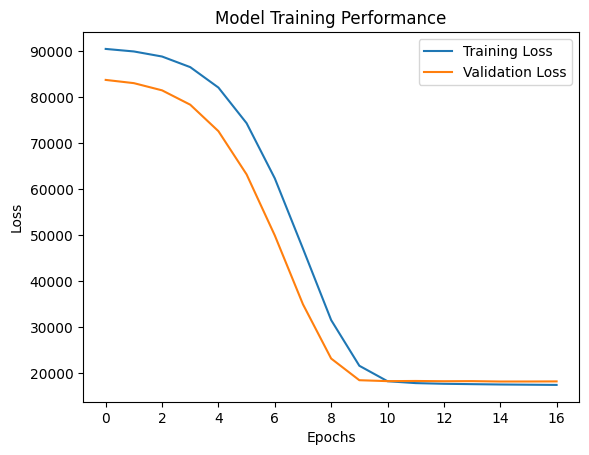

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18785.0273 - r2_score: -0.1412  
Test Mean Absolute Error: -0.12


In [11]:
predictons = model.predict(X_test)
print("Predictions on Test Set:")
print(predictons)  # Display first 5 predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions on Test Set:
[[275.25964]
 [255.20267]
 [249.931  ]
 [183.5306 ]
 [332.01562]
 [321.69247]
 [321.68558]
 [298.32358]
 [303.8513 ]
 [279.18747]
 [231.37724]
 [263.8585 ]
 [280.8844 ]
 [208.3738 ]
 [305.66196]
 [333.66904]
 [249.89374]
 [318.7745 ]
 [307.50708]
 [246.69104]
 [264.57043]
 [274.89316]
 [252.80835]
 [255.87895]
 [244.2825 ]
 [225.13979]
 [253.61195]
 [304.83115]
 [331.52835]
 [272.75922]
 [217.17363]
 [325.90128]
 [272.17966]
 [268.29736]
 [318.0618 ]
 [291.65247]
 [196.81906]
 [257.67432]
 [274.1882 ]
 [238.32187]
 [247.24069]
 [248.99135]
 [251.42389]
 [265.671  ]
 [272.40298]
 [250.51395]
 [263.94128]
 [270.56674]
 [310.405  ]
 [304.08963]
 [197.65901]
 [257.67075]
 [262.6713 ]
 [199.2296 ]
 [303.10846]
 [292.48715]
 [251.68463]
 [320.43475]
 [248.89249]
 [290.7139 ]
 [261.31906]
 [290.09824]
 [284.12936]
 [320.08533]
 [350.9636 ]
 [284.0048 ]
 [312.22302]
 [255.78067]
 [249.0413 ]
 [215.5315 ]
 [326.3063 ]
 [259.55243]
 

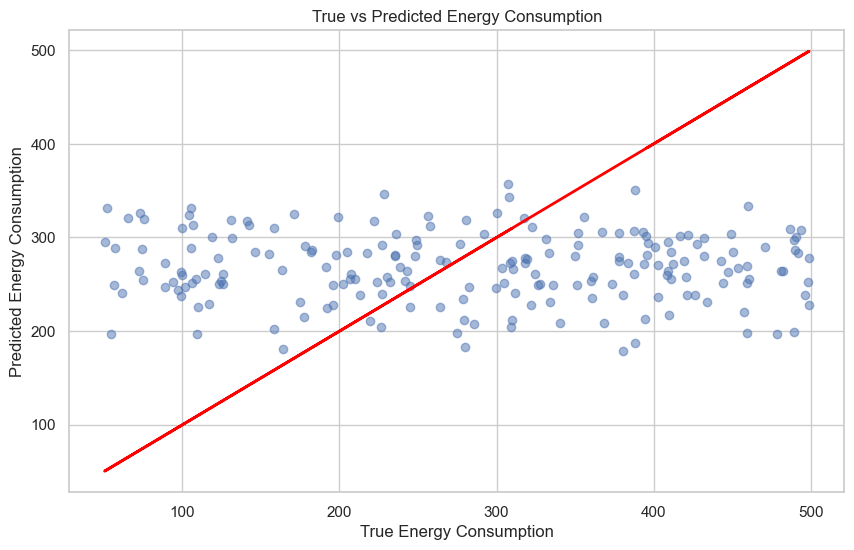

In [12]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictons, alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Diagonal line for perfect predictions
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('True vs Predicted Energy Consumption')
plt.show()